In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
       print(os.path.join(dirname, filename)) 

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/labeled-optical-coherence-tomography-oct/Dataset - train+val+test/val/DRUSEN/DRUSEN-8549730-37.jpeg
/kaggle/input/labeled-optical-coherence-tomography-oct/Dataset - train+val+test/val/DRUSEN/DRUSEN-1237848-61.jpeg
/kaggle/input/labeled-optical-coherence-tomography-oct/Dataset - train+val+test/val/DRUSEN/DRUSEN-5753467-7.jpeg
/kaggle/input/labeled-optical-coherence-tomography-oct/Dataset - train+val+test/val/DRUSEN/DRUSEN-364469-83.jpeg
/kaggle/input/labeled-optical-coherence-tomography-oct/Dataset - train+val+test/val/DRUSEN/DRUSEN-1117376-1.jpeg
/kaggle/input/labeled-optical-coherence-tomography-oct/Dataset - train+val+test/val/DRUSEN/DRUSEN-7345121-21.jpeg
/kaggle/input/labeled-optical-coherence-tomography-oct/Dataset - train+val+test/val/DRUSEN/DRUSEN-8086850-35.jpeg
/kaggle/input/labeled-optical-coherence-tomography-oct/Dataset - train+val+test/val/DRUSEN/DRUSEN-2444883-33.jpeg
/kaggle/input/labeled-optical-coherence-tomography-oct/Dataset - train+val+test/val/DRUSEN/

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle
#from tensorflow.keras.utils import image_datasetim_from_directory
from tensorflow.keras.preprocessing import image_dataset_from_directory


2025-07-07 09:50:30.314343: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751881830.478459      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751881830.525131      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
# Just for check----------------------------------------------------
import os

# List mounted datasets
print(os.listdir('/kaggle/input'))

# Drill into your dataset
base = '/kaggle/input/labeled-optical-coherence-tomography-oct'
for root, dirs, files in os.walk(base):
    print(root, '→', dirs, len(files), 'files')


In [4]:
import tensorflow as tf

# Paths to your datasets
TRAIN_DIR = '/kaggle/input/labeled-optical-coherence-tomography-oct/Dataset - train+val+test/train'
VAL_DIR = '/kaggle/input/labeled-optical-coherence-tomography-oct/Dataset - train+val+test/val'
TEST_DIR = '/kaggle/input/labeled-optical-coherence-tomography-oct/Dataset - train+val+test/test'

# Load training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN_DIR,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    interpolation="bilinear"
)

# Load validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    VAL_DIR,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=False,
    interpolation="bilinear"
)

# Load test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    TEST_DIR,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=False,
    interpolation="bilinear"
)

# Inspect the datasets
for images, labels in train_ds.take(1):
    print("Train batch:", images.shape, labels.shape)
for images, labels in val_ds.take(1):
    print("Validation batch:", images.shape, labels.shape)
for images, labels in test_ds.take(1):
    print("Test batch:", images.shape, labels.shape)


KeyboardInterrupt: 

In [2]:
training_set = image_dataset_from_directory(
    '/kaggle/input/labeled-optical-coherence-tomography-oct/Dataset - train+val+test/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 76515 files belonging to 4 classes.


I0000 00:00:1751881960.113540      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [3]:
validation_set = image_dataset_from_directory(
    '/kaggle/input/labeled-optical-coherence-tomography-oct/Dataset - train+val+test/val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 21861 files belonging to 4 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [8]:
INPUT_SHAPE = (224, 224, 3)

In [14]:
mobnet = tf.keras.applications.MobileNetV3Large(
    input_shape=INPUT_SHAPE,
    alpha=1.0,
    minimalistic=False,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    classes=1000,
    pooling=None,
    dropout_rate=0.2,
    classifier_activation="softmax",
    include_preprocessing=True,
    # name="MobileNetV3Large",
)

22661472/22661472 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [15]:
model = tf.keras.models.Sequential()

In [16]:
model = tf.keras.models.Sequential()
model.add(mobnet)  



In [17]:
model.add(tf.keras.layers.Dense(units = 4,activation='softmax'))

In [18]:
metrics_list = ['accuracy',
                tf.keras.metrics.F1Score()]

In [19]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=metrics_list)


In [20]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ MobileNetV3Large (Functional)        │ (None, 1000)                │       5,507,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │           4,004 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,511,436 (21.02 MB)

 Trainable params: 5,487,036 (20.93 MB)

 Non-trainable params: 24,400 (95.31 KB)

In [21]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=15)

Epoch 1/15


I0000 00:00:1751882508.137471     102 service.cc:148] XLA service 0x7fac78001690 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751882508.138142     102 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1751882512.217729     102 cuda_dnn.cc:529] Loaded cuDNN version 90300
E0000 00:00:1751882518.923565     102 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1751882519.108270     102 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1751882519.542478     102 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1751882519.7396

   1/2392 ━━━━━━━━━━━━━━━━━━━━ 44:45:34 67s/step - accuracy: 0.0625 - f1_score: 0.0647 - loss: 1.3870

I0000 00:00:1751882535.154038     102 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2391/2392 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.8484 - f1_score: 0.6268 - loss: 1.2326

E0000 00:00:1751882720.757488     100 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1751882720.953541     100 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


2392/2392 ━━━━━━━━━━━━━━━━━━━━ 323s 107ms/step - accuracy: 0.8484 - f1_score: 0.6269 - loss: 1.2325 - val_accuracy: 0.8789 - val_f1_score: 0.6815 - val_loss: 0.9660
Epoch 2/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 199s 83ms/step - accuracy: 0.8888 - f1_score: 0.6989 - loss: 0.8950 - val_accuracy: 0.9578 - val_f1_score: 0.9272 - val_loss: 0.7124
Epoch 3/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 199s 83ms/step - accuracy: 0.9536 - f1_score: 0.9189 - loss: 0.6702 - val_accuracy: 0.9567 - val_f1_score: 0.9215 - val_loss: 0.5543
Epoch 4/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 199s 83ms/step - accuracy: 0.9601 - f1_score: 0.9306 - loss: 0.5137 - val_accuracy: 0.9581 - val_f1_score: 0.9294 - val_loss: 0.4282
Epoch 5/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 200s 83ms/step - accuracy: 0.9602 - f1_score: 0.9321 - loss: 0.4043 - val_accuracy: 0.9659 - val_f1_score: 0.9408 - val_loss: 0.3409
Epoch 6/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 199s 83ms/step - accuracy: 0.9670 - f1_score: 0.9434 - loss: 0.3153 - val_accuracy: 0.9668 - 

In [22]:
model.save("Trained_Model.h5")

In [23]:
model.save("Trained_Model.keras")

In [24]:
# Saving history
with open('Training_history.pkl', 'wb') as f:
    pickle.dump(training_history.history, f)

In [ ]:
#Reloading History from pickle
with open('Training_history.pkl', 'rb') as f:
    load_history = pickle.load(f)
load_history

{'accuracy': [0.875187873840332,
  0.898137629032135,
  0.9548454284667969,
  0.9603737592697144,
  0.9620205163955688,
  0.9671567678451538,
  0.973220944404602,
  0.9757825136184692,
  0.9793504476547241,
  0.9825393557548523,
  0.9850748181343079,
  0.9868261218070984,
  0.9882898926734924,
  0.9889825582504272,
  0.990093469619751],
 'f1_score': [<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9193368 , 0.8421403 , 0.00159566, 0.9212915 ], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9512386 , 0.9130052 , 0.25396398, 0.92111963], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9608242 , 0.93067336, 0.8136474 , 0.97991854], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.96571535, 0.9390756 , 0.83873564, 0.98210746], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9663791 , 0.9449614 , 0.84515417, 0.98342544], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=ar

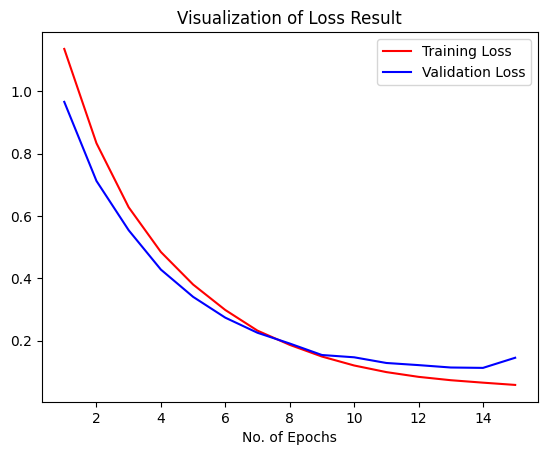

In [26]:
#Loss Visualization
epochs = [i for i in range(1,16)]
plt.plot(epochs,load_history['loss'],color='red',label='Training Loss')
plt.plot(epochs,load_history['val_loss'],color='blue',label='Validation Loss')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Loss Result')
plt.legend()
plt.show()

In [28]:
test_set = validation_set = image_dataset_from_directory(
    '/kaggle/input/labeled-optical-coherence-tomography-oct/Dataset - train+val+test/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=64,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 10933 files belonging to 4 classes.


In [29]:
test_loss,test_acc,f1_score = model.evaluate(test_set)

171/171 ━━━━━━━━━━━━━━━━━━━━ 34s 170ms/step - accuracy: 0.9628 - f1_score: 0.9392 - loss: 0.1424


In [30]:
test_loss

0.14937067031860352

In [31]:
test_acc

0.9614927172660828

In [32]:
f1_score

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9689859 , 0.9049552 , 0.8869765 , 0.98233277], dtype=float32)>

# Model Evalution


In [33]:
model = tf.keras.models.load_model("Trained_Model.h5")

ValueError: Only input tensors may be passed as positional arguments. The following argument value should be passed as a keyword argument: 3.0 (of type <class 'float'>)

In [34]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ MobileNetV3Large (Functional)        │ (None, 1000)                │       5,507,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │           4,004 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,485,510 (62.89 MB)

 Trainable params: 5,487,036 (20.93 MB)

 Non-trainable params: 24,400 (95.31 KB)

 Optimizer params: 10,974,074 (41.86 MB)

In [35]:
test_set = validation_set = image_dataset_from_directory(
    '/kaggle/input/labeled-optical-coherence-tomography-oct/Dataset - train+val+test/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=64,
    image_size=(224, 224),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 10933 files belonging to 4 classes.


In [36]:
##Computing True labels from test set
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [37]:
Y_true

<tf.Tensor: shape=(10933,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3])>

In [38]:
##Computing Predicted labels using test set
predicted_categories = model.predict(test_set)
Y_pred = tf.argmax(predicted_categories, axis=1)

171/171 ━━━━━━━━━━━━━━━━━━━━ 22s 97ms/step


In [39]:
Y_true

<tf.Tensor: shape=(10933,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3])>

In [40]:
Y_pred

<tf.Tensor: shape=(10933,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3])>

# 1. Classification Report

In [41]:
from sklearn.metrics import classification_report
print(classification_report(Y_true,Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3746
           1       0.86      0.96      0.90      1161
           2       0.90      0.87      0.89       887
           3       0.99      0.98      0.98      5139

    accuracy                           0.96     10933
   macro avg       0.93      0.94      0.94     10933
weighted avg       0.96      0.96      0.96     10933



# 2. Confusion Matrix

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_true,Y_pred)
cm

array([[3593,   84,   65,    4],
       [  16, 1114,    0,   31],
       [  55,   20,  773,   39],
       [   6,   83,   18, 5032]])

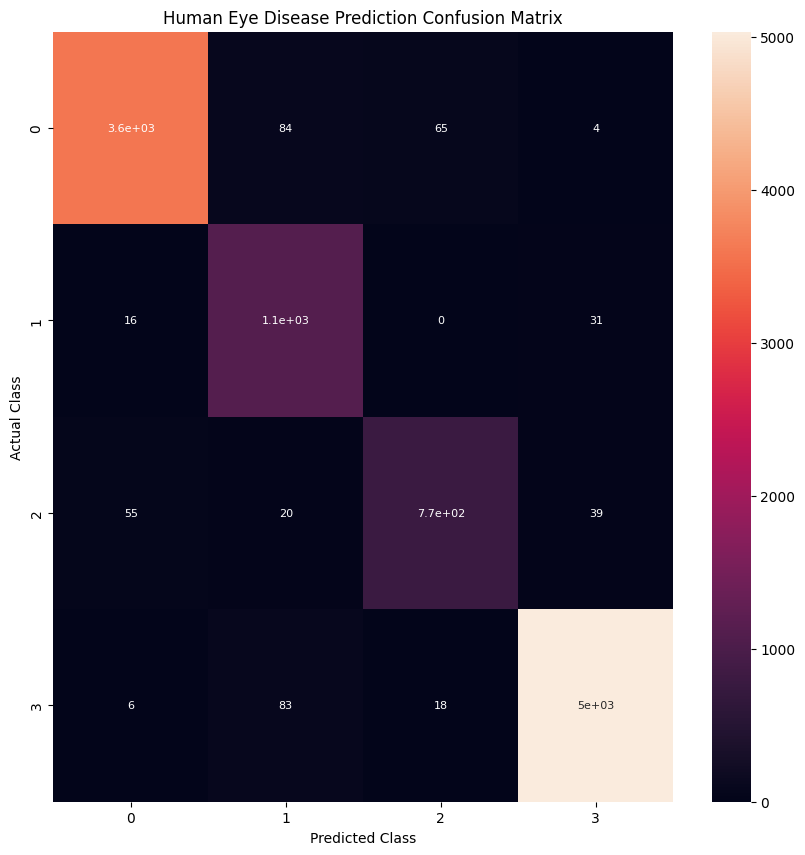

In [43]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,annot_kws={"size":8})
plt.xlabel("Predicted Class",fontsize=10)
plt.ylabel("Actual Class",fontsize=10)
plt.title("Human Eye Disease Prediction Confusion Matrix",fontsize=12)
plt.show()